<div><font face="Times New Roman" size=7><br><br>
<center>
Linear Regression and Regularization
<center><br></div>
 

### Machine Learning for Bioinformatics: Homework 1 (Practical)
*Refer to (preferably)Quera or Amir Soleimanifar for any questions you have or other inconveniences*  
*Telegram ID: @amirsoleix*  
*Email: asoleix@gmail.com*

## Overview
<font face="Arial" size=4><br>
We want to train a model which estimates obesity levels based on eating habits and physical conditions of an individual. For our purpose, we will use a dataset of individuals from the countries of Mexico, Peru and Columbia.  
The dataset was collected by Fabio Mendoza Palechor and ALexis de la Hoz Manotas.

## Description 
<font face="Arial" size=4><br>
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Practical Phase 
<font face="Arial" size=4><br>
You need to complete each section by writing the relevant code, running and assessing the results. Feel free to add new code or markdown cells. After all snippets have been completed, save the results and upload the Jupyter notebook.

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Config libraries
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [3]:
# Read the dataset
df = pd.read_csv('./dataset_bmi.csv')
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,18.9
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,22.7
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,21.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,28.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,26.6


## Split the Data  
<font face="Arial" size=4><br>
Split the data to training (80 percent) and test (20 percent) sets using Stratified Sampling on `BMI` column.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Categorize BMI, so we can strattify based on BMI group, which is a discrete value
# Discretization of BMI (Intervals come from the wikipedia page of BMI)
df['BMI_CAT'] = pd.cut(df['BMI'], bins=[0.0, 16.0, 16.9, 18.4, 24.9, 29.9, 34.9, 39.9, 100.0], labels=['Underweight_3', 'Underweight_2', 'Underweight_1', 'Normal', 'Overweight', 'Obese_1', 'Obese_2', 'Obese_3'], include_lowest=True)

# Create test and train datasets. Strattify based on BMI category. Note that the train and test data contain the whole table, so we don't need the last two outputs of function.
train_data, test_data, bin0, bin1 = train_test_split(df, df['BMI_CAT'], test_size=0.2, train_size=0.8, shuffle=True, random_state=93, stratify=df['BMI_CAT'])

print(len(train_data), len(test_data))
print(train_data.head().iloc[:, -1])
print()
print(test_data.head().iloc[:, -1])


1688 423
480         Normal
472     Overweight
267        Obese_1
1910       Obese_3
1797       Obese_2
Name: BMI_CAT, dtype: category
Categories (8, object): ['Underweight_3' < 'Underweight_2' < 'Underweight_1' < 'Normal' < 'Overweight' < 'Obese_1' < 'Obese_2' < 'Obese_3']

481            Normal
1551          Obese_2
1553          Obese_1
855        Overweight
621     Underweight_3
Name: BMI_CAT, dtype: category
Categories (8, object): ['Underweight_3' < 'Underweight_2' < 'Underweight_1' < 'Normal' < 'Overweight' < 'Obese_1' < 'Obese_2' < 'Obese_3']


### Exploratory Data Analysis : 1  
<font face="Arial" size=4><br>
Analyze the data and find information about different attributes. Requested items are:
1. Number of categories and distribution of them in either plots or numbers

In [5]:
# part 1
# function for calculating distribution of categories
import matplotlib.pyplot as plt

def category_dist(data):
    grouped_data = data.groupby(by='BMI_CAT')
    agg_data = grouped_data.aggregate(Count=('BMI_CAT', 'count'))
    agg_data['frequency'] = agg_data.apply(lambda x: x/len(train_data.index))
    
    return agg_data

def plot_category_dist(data):
    plt.bar(data.index.categories, data['Count'].values)
    plt.xticks(rotation=90)

    plt.show()

Num of categories: 8


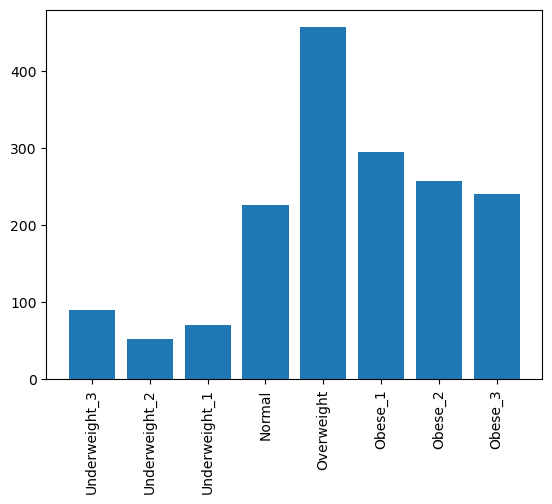

In [6]:
# part 1 
# train data

train_cat_dist = category_dist(train_data)

print("Num of categories:", len(train_cat_dist.index.categories))
plot_category_dist(train_cat_dist)



Num of categories: 8


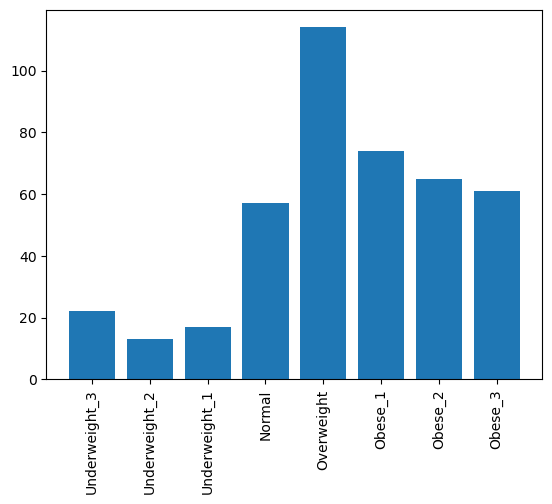

In [7]:
# part 1 
# test data

test_cat_dist = category_dist(test_data)

print("Num of categories:", len(test_cat_dist.index.categories))
plot_category_dist(test_cat_dist)


### Exploratory Data Analysis: 2
<font face="Arial" size=4><br>
2. Mean, std, and quartiles of numerical attributes



In [8]:
# part 2
# original data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.902132
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.460415
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.550000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,29.300000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.600000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [9]:
# part 2
# train data
train_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.290125,1.701006,86.441723,2.413688,2.692156,2.009430,1.008422,0.655279,29.912855
std,6.314618,0.093061,26.123567,0.538026,0.784438,0.616468,0.844961,0.602070,8.455257
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.800000
25%,19.870974,1.629388,65.483043,2.000000,2.658289,1.585688,0.129009,0.000000,24.600000
50%,22.821925,1.700000,83.000000,2.367128,3.000000,2.000000,1.000000,0.625215,29.300000
75%,26.000000,1.768285,106.569241,3.000000,3.000000,2.488593,1.677185,1.000000,36.625000
max,56.000000,1.975663,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,48.500000


In [10]:
# part 2
# test data
test_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,24.402289,1.704357,87.162034,2.440414,2.659580,2.002350,1.017783,0.668188,29.859338
std,6.476371,0.094333,26.482554,0.517313,0.752302,0.599408,0.873684,0.636188,8.490859
min,15.000000,1.483284,40.202773,1.000000,1.000000,1.000000,0.000000,0.000000,13.200000
25%,20.000000,1.633841,65.711971,2.000000,2.676552,1.584812,0.113911,0.000000,24.400000
50%,22.675679,1.705813,82.636162,2.407817,3.000000,2.000000,1.000000,0.630866,29.400000
75%,26.000000,1.769417,109.749962,3.000000,3.000000,2.443450,1.625346,1.000000,36.250000
max,61.000000,1.980000,160.935351,3.000000,4.000000,3.000000,3.000000,2.000000,47.500000


### Exploratory Data Analysis : 3
<font face="Arial" size=4><br>
3. Check for existence of NaN or empty rows
<br>
<br>
<span style="font-size: 0.85em;">There were no empty or NaN fields</span>

In [11]:
# part 3 : check for existense of NaN or empty rows
null_row = df.isnull().values.sum()
NaN_row_count = df.isna().values.sum()

print('Empty Row Count:', null_row)
print('Nan Row Count:', NaN_row_count)

Empty Row Count: 0
Nan Row Count: 0


In [12]:
# part 4
# correlation between columns in the matrix
# function to plot correlation for data
def plot_correlation(data): 
    corr_matrix = data.corr()
    cols = corr_matrix.index.tolist()

    plt.matshow(corr_matrix, cmap='hot')
    plt.xticks(rotation=90, ticks=range(len(cols)), labels=cols)
    plt.yticks(ticks=range(len(cols)), labels=cols)

    plt.show()

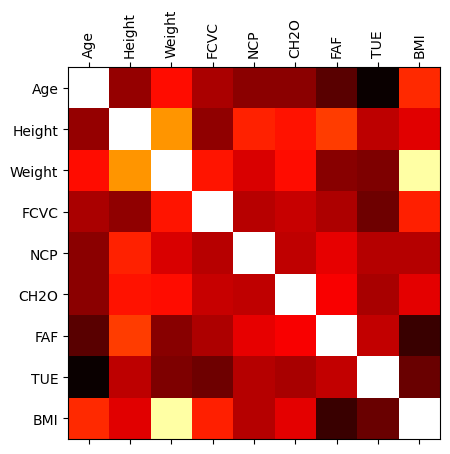

In [13]:
# part 4
# correlation matrix for the original data
plot_correlation(df)

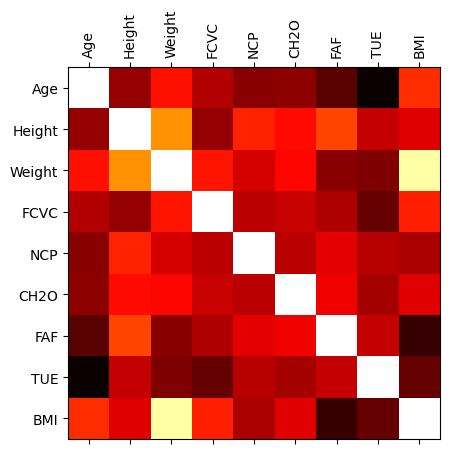

In [14]:
# part 4
# correlation matrix for the train data
plot_correlation(train_data)

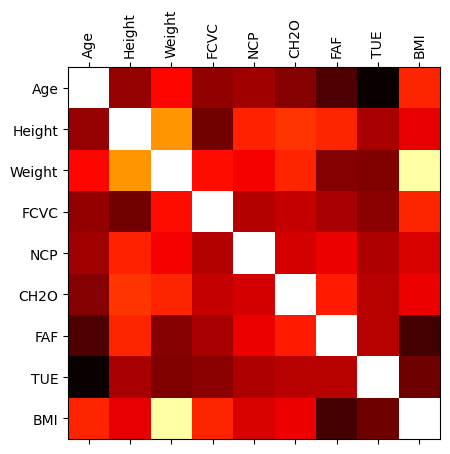

In [15]:
# part 4
# correlation matrix for the test data
plot_correlation(test_data)

## Data Cleaning and Manipulation

##### Transformation of Attributes 
OrdinalEncoder, and OneHotEncoder classes of scikit-learn are used for encoding categorical values. the function "make_column_transformer" is a convinient method to chain the encoders. 

##### Ordinal vs One-Hot Encoder
Features that have a natural order should be transformed using ordinal encoder. Attributes like "CAEC" which represent the frequency of something, have a natural order (From never, to always). Meanwhile, no order can be defined for the "Gender" attribute. These attributes should be encoded via one-hot encoder. 

In [57]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import set_config
from sklearn.compose import make_column_transformer


nominal_features = ['Gender', 'SMOKE', 'FAVC', 'SCC']
ordinal_features = ['CAEC', 'MTRANS', 'family_history_with_overweight', 'CALC', 'BMI_CAT']
numeric_features = df.columns.difference(nominal_features + ordinal_features).tolist()

# Make nominal and ordinal transformers.For features that do not have a natural order or rank, OneHotEncoder is chosen.
transformer = make_column_transformer(
    ('passthrough', numeric_features),
    (OrdinalEncoder(), ordinal_features),
    (OneHotEncoder(), nominal_features),
    verbose_feature_names_out=False
)

df_transformed_np = transformer.fit_transform(df)
column_names = (
    numeric_features
    + ordinal_features    
    + transformer.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
df_transformed = pd.DataFrame(df_transformed_np, columns=column_names)
df_transformed


,Age,BMI,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,CAEC,MTRANS,family_history_with_overweight,CALC,BMI_CAT,Gender_Female,Gender_Male,SMOKE_no,SMOKE_yes,FAVC_no,FAVC_yes,SCC_no,SCC_yes
0,21.000000,18.9,2.000000,0.000000,2.0,1.620000,3.0,1.000000,64.000000,2.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,21.000000,22.7,3.000000,3.000000,3.0,1.520000,3.0,0.000000,56.000000,2.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,23.000000,21.6,2.000000,2.000000,2.0,1.800000,3.0,1.000000,77.000000,2.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,27.000000,28.0,2.000000,2.000000,3.0,1.800000,3.0,0.000000,87.000000,2.0,4.0,0.0,1.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,22.000000,26.6,2.000000,0.000000,2.0,1.780000,1.0,0.000000,89.800000,2.0,3.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,41.1,1.728139,1.676269,3.0,1.710730,3.0,0.906247,131.408528,2.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2107,21.982942,42.2,2.005130,1.341390,3.0,1.748584,3.0,0.599270,133.742943,2.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2108,22.524036,39.8,2.054193,1.414209,3.0,1.752206,3.0,0.646288,133.689352,2.0,3.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2109,24.361936,42.3,2.852339,1.139107,3.0,1.739450,3.0,0.586035,133.346641,2.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


### Principal Component Analysis  
<font face="Arial" size=4><br>
Use `sklearn.decomposition.PCA` to reduce the dimension of dataset to a convenient number. Plot the scree plot for the final solution.

## Model Training  
<font face="Arial" size=4><br>
Train the <code>linear regression</code> model and its regularized forms (<code>ridge</code> and <code>lasso</code>) on your training data. Cross-validate the models using <code>10 fold CV</code> and report the accuracy scores. You are allowed to use <code>sklearn.linear_model</code> for your implementation.

### Linear Regression

### Ridge Regression

### Lasso Regression

## Final Report  
<font face="Arial" size=4><br>
After training the data, use your pipeline previously created to transform the test data to decent form and then run your final model and report the accuracy score.

<font face="Arial" size=4><br>
Discuss why you think this model worked best for the selected datasets and mention 3 areas where extra effort can be put into work to enhance the accuracy.